# Day 08. Exercise 04
# Regression

## 0. Imports

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import numpy as np
import matplotlib.pyplot as plt

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [2]:
df = pd.read_csv("../data/checker_regression.csv")

In [3]:
df = df.fillna(0)
df = df.drop_duplicates(keep='first')
df = df.drop('uid', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 0 to 76
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   num_commits  29 non-null     int64  
 1   pageviews    29 non-null     float64
 2   AVG(diff)    29 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 928.0 bytes


In [4]:
#encoder = OneHotEncoder(sparse_output=False)
#encoded_data = encoder.fit_transform(df[['uid']]) # array
#encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['uid']))
#df = pd.merge(df, encoded_df, left_index=True, right_index=True)
#df = df.drop(['uid'], axis=1)
#df

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('AVG(diff)', axis=1), df['AVG(diff)'], test_size=0.2, random_state=21)

In [6]:
X = df.drop('AVG(diff)', axis=1)
y = df['AVG(diff)']
#X, y

## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [7]:
def crossval (n_splits, features, target, model):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=21)
    test_RMSE_scores = []
    for train_index, test_index in kf.split(features):
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]

        model.fit(X_train, y_train)

        pred_train = model.predict(X_train)
        pred_test = model.predict(X_test)

        rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
        rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

        test_RMSE_scores.append(rmse_test)

        print(f"train - {rmse_train} | test - {rmse_test}")
    
    avg_rmse_test = np.mean(test_RMSE_scores)
    print(f"Average RMSE on crossval for model {model} is {avg_rmse_test}")

In [8]:
# 29 - на всех образцах
crossval(29, X, y, LinearRegression(fit_intercept=True))

train - 61.9100696985256 | test - 17.577438430883213
train - 59.593757953111854 | test - 92.44612200531822
train - 61.56871746360184 | test - 39.99976381475493
train - 60.581186998678454 | test - 71.17546042527111
train - 61.902888818876384 | test - 19.06895902614903
train - 61.72853306763227 | test - 31.058097308115258
train - 60.480306602877086 | test - 112.62590625490884
train - 61.92463875141 | test - 16.74515071287609
train - 60.582363893833914 | test - 71.25166923870542
train - 58.481219676995245 | test - 111.28277307190844
train - 60.94884466311085 | test - 61.4103426809802
train - 60.74067510428403 | test - 67.48056945320192
train - 61.16958309963018 | test - 55.00189040387501
train - 59.34680217238801 | test - 98.17964315362809
train - 61.319253137995815 | test - 50.64661608586198
train - 60.68987478844664 | test - 68.79721905415342
train - 61.46200493849512 | test - 43.98315032546972
train - 60.318795877144886 | test - 79.79734984481784
train - 61.18595388743472 | test - 53.8

In [9]:
crossval(29, X, y, DecisionTreeRegressor(criterion='squared_error', splitter='best', random_state=21, max_depth=15, min_samples_leaf=3, max_features=30))
# min_samples_leaf - мин кол-во образцов в листе
# max_features - кол-во учтенных фич при поиске лучшего разделения

train - 38.76849451975202 | test - 94.29333333333332
train - 38.60803532341929 | test - 71.47000000000001
train - 38.675080502202604 | test - 0.0
train - 38.623759479060254 | test - 11.783333333333331
train - 38.675080502202604 | test - 0.0
train - 31.334319175642836 | test - 134.11666666666665
train - 38.675080502202604 | test - 0.0
train - 38.675080502202604 | test - 0.0
train - 38.675080502202604 | test - 0.0
train - 38.18751399171887 | test - 36.21666666666667
train - 38.675080502202604 | test - 0.0
train - 38.443363524463805 | test - 38.81111111111111
train - 38.788812317198314 | test - 22.588888888888896
train - 35.329624218035015 | test - 93.0875
train - 37.985961622990146 | test - 43.0
train - 38.675080502202604 | test - 0.0
train - 36.615960964961246 | test - 73.6625
train - 36.51624851245374 | test - 75.375
train - 38.675080502202604 | test - 0.0
train - 38.675080502202604 | test - 0.0
train - 38.675080502202604 | test - 0.0
train - 34.41563572190491 | test - 111.633333333333

In [10]:
crossval(29, X, y, RandomForestRegressor(criterion='squared_error', n_estimators=10, random_state=21, max_depth=15, min_samples_leaf=6, max_features=35))       

train - 49.29830230377184 | test - 27.891914974323065
train - 47.30887780744628 | test - 70.70698272343127
train - 54.45074559813806 | test - 31.1439907219973
train - 51.29393216379941 | test - 57.961809603823525
train - 52.483576329587535 | test - 28.486677559912852
train - 50.12188995792217 | test - 52.536157601929666
train - 49.93049959764296 | test - 11.811217410040939
train - 48.55754061907667 | test - 13.320333333333334
train - 50.13925396955089 | test - 30.28003845704949
train - 47.58994126537147 | test - 99.71227754013415
train - 54.969467740069014 | test - 28.07597222222222
train - 47.00559196528594 | test - 72.92535552832244
train - 50.57232508271959 | test - 50.83274008467022
train - 48.50919067867591 | test - 81.60794324180722
train - 50.341835507974885 | test - 47.02195417994315
train - 53.402990137175195 | test - 33.49210927960928
train - 50.04600245925343 | test - 61.87468759505603
train - 49.60337026254435 | test - 75.9589530812325
train - 52.23231315715938 | test - 29.

## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

In [11]:
def draw_plot(target, prediction):
    plt.figure(figsize=(15, 8))
    plt.scatter(target, prediction, color='gray', s=50)

    max_val = max(max(target), max(prediction))
    min_val = min(min(target), min(prediction))
    plt.plot([min_val, max_val], [min_val, max_val], color='red', lw=2,label='Perfect prediction')

    for (actual, predicted) in zip(target, prediction):
        plt.plot([actual, actual], [actual, predicted], 'gray', linestyle='--', linewidth=1, alpha=0.8)


    plt.xlabel('target')
    plt.ylabel('prediction')
    plt.grid(alpha=0.5)
    plt.show()

In [12]:
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

In [13]:
y_test

52    -52.333333
60   -157.400000
6       0.000000
36   -137.200000
15      0.000000
20    -39.333333
Name: AVG(diff), dtype: float64

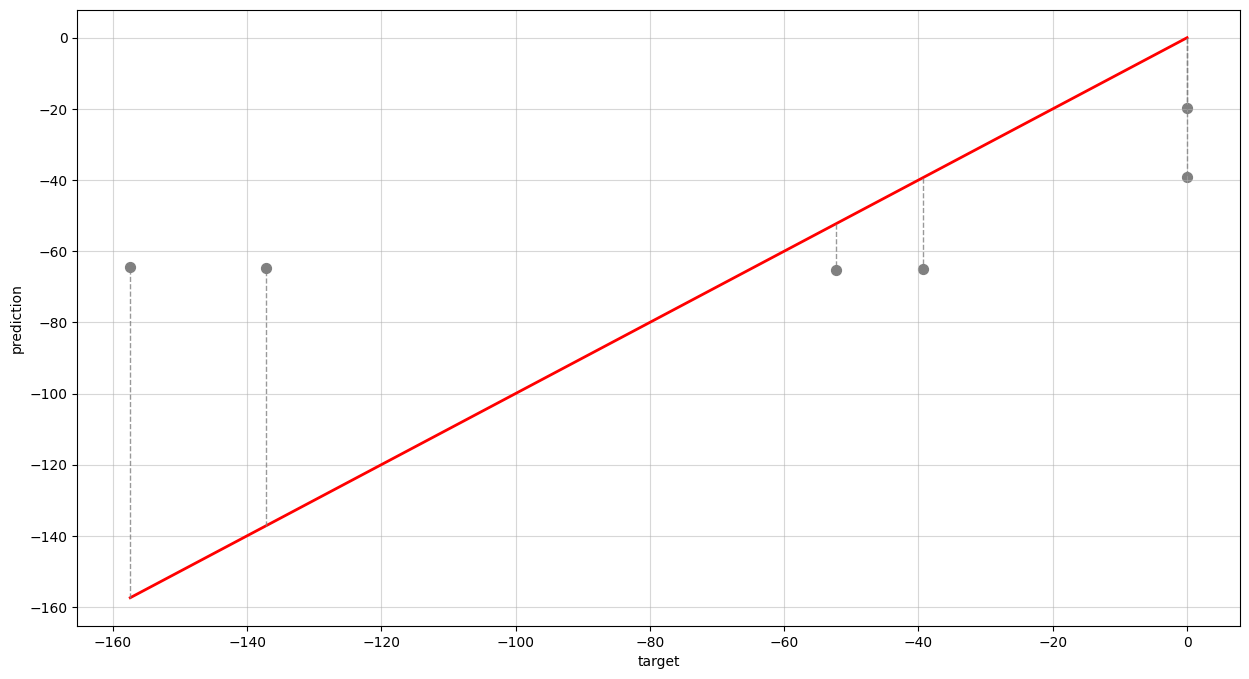

In [14]:
draw_plot(y_test, y_pred)

In [15]:
tree_model = DecisionTreeRegressor(criterion='squared_error', splitter='best', random_state=21, max_depth=15, min_samples_leaf=3, max_features=30)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

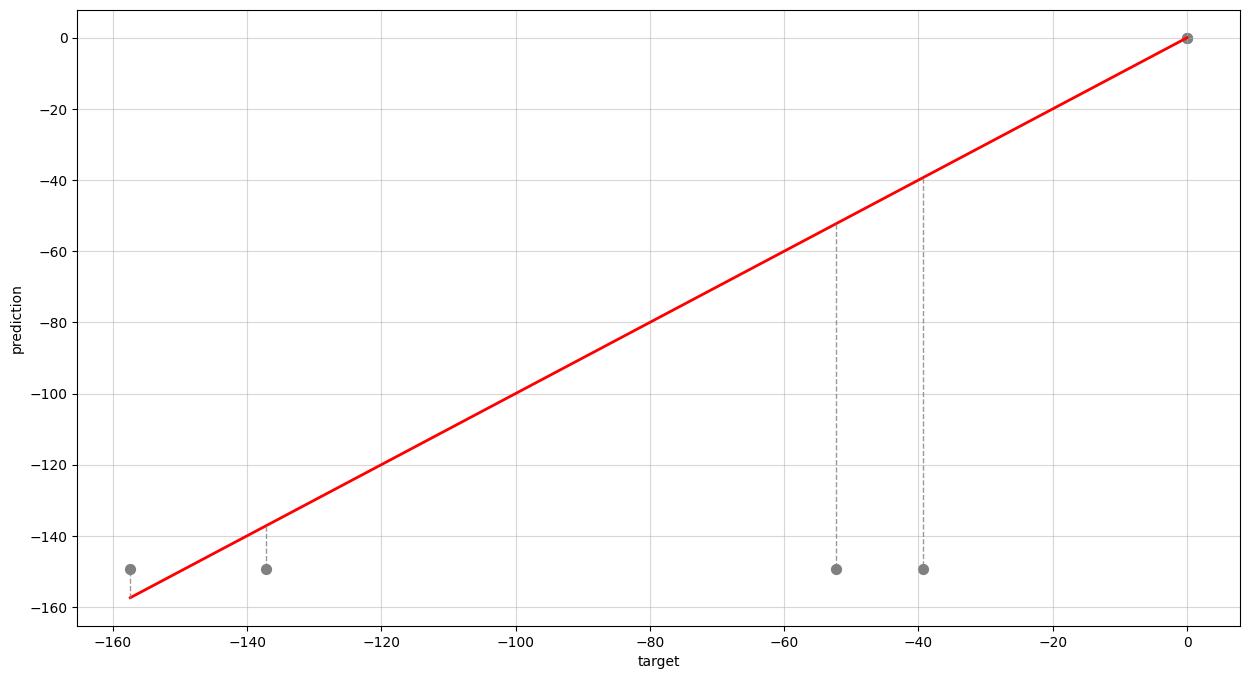

In [16]:
draw_plot(y_test, y_pred)

In [17]:
forest_model = RandomForestRegressor(criterion='squared_error', n_estimators=10, random_state=21, max_depth=15, min_samples_leaf=6, max_features=35)
forest_model.fit(X_train, y_train)
y_pred = forest_model.predict(X_test)

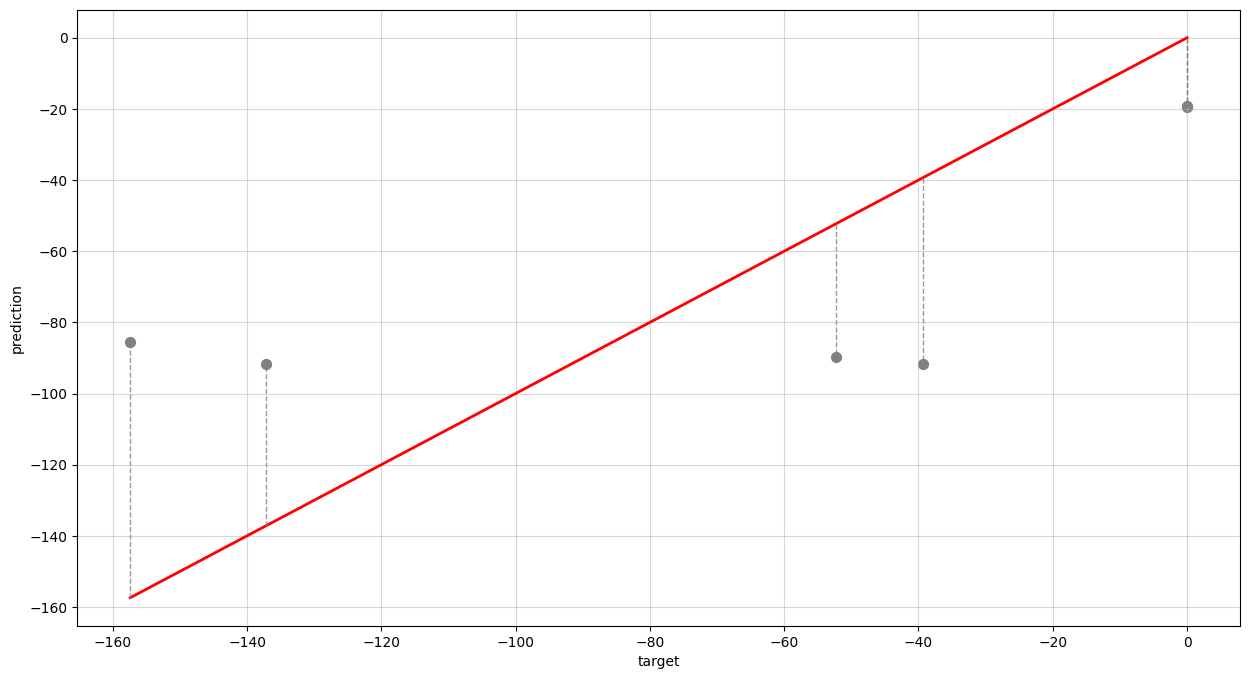

In [18]:
draw_plot(y_test, y_pred)

Прямая диагональнаяльная линия (на графиках красная)